In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("heading_error_dataset.csv")

df['heading_error'] = df['heading_error']

# 2) delta normalization
df['delta_encL'] = df['delta_encL'] / 100.0
df['delta_encR'] = df['delta_encR'] / 100.0

# 3) label one-hot
df['label_forward'] = (df['label'] == 'forward').astype(int)
df['label_left']     = (df['label'] == 'left').astype(int)
df['label_right']    = (df['label'] == 'right').astype(int)

# 4) input col
feature_cols = [
    'label_forward', 'label_left', 'label_right',
    'delta_encL', 'delta_encR', 'heading_error'
]

# 5) output col
label_cols = ['cmdL', 'cmdR']

# 6) X(t), Y(t+1)
X = df[feature_cols].iloc[:-1].values
Y = df[label_cols].iloc[1:].values

print("X shape:", X.shape)
print("Y shape:", Y.shape)

print("X :", X[:5])
print("Y :", Y[:5])

X shape: (7524, 6)
Y shape: (7524, 2)
X : [[ 1.      0.      0.      0.      0.      0.    ]
 [ 1.      0.      0.     -0.02   -0.02    0.    ]
 [ 1.      0.      0.     -0.12   -0.07    0.    ]
 [ 1.      0.      0.     -0.09   -0.07    0.1875]
 [ 1.      0.      0.     -0.09   -0.09    0.1875]]
Y : [[10 10]
 [10 10]
 [10 11]
 [10 11]
 [10 11]]


Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0558 - val_loss: 0.0194
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026 - val_loss: 0.0038
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1613e-04 - val_loss: 0.0026
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6637e-04 - val_loss: 0.0025
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4689e-04 - val_loss: 0.0025
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9853e-04 - val_loss: 0.0023
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8238e-04 - val_loss: 0.0023
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9254e-04 - val_loss: 0.0024
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8158e-04 - val_loss: 0.0024
Epoch 10/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8172e-04 - val_loss: 0.0024
Epoch 11/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6282e-04 - val_loss: 0.0026
Epoch 12/50
95/95 ━━━━━━━━━━━━━━━━━━━━

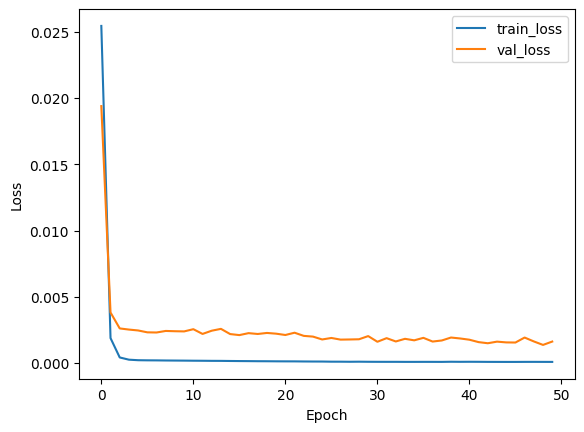

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
실제 Y:
 [[10 10]
 [10 10]
 [10 11]
 [10 11]
 [10 11]]
예측 Y:
 [[0.12706889 0.06718222]
 [0.11942438 0.06867162]
 [0.09977265 0.06496359]
 [0.09552816 0.07012534]
 [0.08971398 0.07498372]]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Y /127
Y_norm = Y.astype(np.float32) / 127.0

# model structure
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),  # 첫 레이어 64
    Dense(32, activation='relu'),                             # 두 번째 레이어 32
    Dense(16, activation='relu'),                             # 세 번째 레이어 16
    Dense(2, activation='sigmoid')                            # 출력: curr_cmdL/R (0~1 스케일)
])


model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

#
history = model.fit(X, Y_norm, epochs=50, batch_size=64, validation_split=0.2)

# check results
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# predict
Y_pred = model.predict(X[:5])
print("실제 Y:\n", Y[:5])
print("예측 Y:\n", Y_pred)

pred_scaled = (Y_pred * 127.0).astype(np.int32)

In [ ]:
#more predict
Y_pred = model.predict(X[:10])
pred_scaled = (Y_pred * 127.0).astype(np.int32)
print("실제 Y:", Y[:10],"예측 Y:\n", pred_scaled)



Y_pred = model.predict(X[3045:3050])
pred_scaled = (Y_pred * 127.0).astype(np.int32)
print("실제 Y:", Y[3045:3050],"예측 Y:\n", pred_scaled)

Y_pred = model.predict(X[1045:1050])
pred_scaled = (Y_pred * 127.0).astype(np.int32)
print("실제 Y:", Y[1045:1050],"예측 Y:\n", pred_scaled)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
실제 Y: [[10 10]
 [10 10]
 [10 11]
 [10 11]
 [10 11]
 [10 12]
 [10 12]
 [10 12]
 [10 13]
 [10 13]] 예측 Y:
 [[16  8]
 [15  8]
 [12  8]
 [12  8]
 [11  9]
 [10  9]
 [10 10]
 [10 10]
 [10 10]
 [10 10]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
실제 Y: [[15 20]
 [15 20]
 [15 19]
 [15 19]
 [15 19]] 예측 Y:
 [[15 19]
 [15 19]
 [15 19]
 [14 20]
 [15 19]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
실제 Y: [[10 14]
 [10 14]
 [10 14]
 [10 15]
 [10 15]] 예측 Y:
 [[10 13]
 [ 9 16]
 [10 14]
 [10 13]
 [ 9 16]]


In [ ]:
for layer in model.layers:
    w = layer.get_weights()
    if len(w) == 0:
        continue
    W, b = w
    print(f"\n=== Layer: {layer.name} ===")
    print("Weights shape:", W.shape)
    print(W)
    print("Bias shape:", b.shape)
    print(b)


=== Layer: dense_4 ===
Weights shape: (45, 64)
[[-0.10787672 -0.2786264  -0.14356989 ... -0.015927   -0.26805684
  -0.45429787]
 [-0.03196019 -0.03885967 -0.12514511 ... -0.17912892  0.00767232
  -0.05147849]
 [ 0.23127703  0.1738434   0.08581991 ...  0.16579635 -0.15918969
  -0.21742642]
 ...
 [ 0.19225995 -0.02354391 -0.04933894 ... -0.12288414  0.031502
  -0.05102536]
 [-0.13364267 -0.13807884 -0.00654826 ... -0.12906325 -0.03634628
   0.24493054]
 [ 0.02480339  0.10998504  0.05559157 ... -0.10362929 -0.14403975
   0.2108654 ]]
Bias shape: (64,)
[ 0.         -0.10100429  0.          0.         -0.0513718   0.00248823
  0.          0.          0.11475688  0.         -0.00123562  0.
  0.          0.13591523  0.          0.         -0.04008194 -0.01112807
  0.00327581 -0.00992209  0.00443634  0.07537583  0.          0.
  0.          0.03174593 -0.07007457  0.0134647   0.         -0.07149243
 -0.01297137 -0.10756369  0.05596771  0.         -0.01029477  0.15121543
  0.1469406   0.047272

In [ ]:
#print weight & bias for HLS
layer_id = 1

for layer in model.layers:
    weights = layer.get_weights()

    # Dense 레이어만 처리 (weight가 없는 레이어는 skip)
    if len(weights) == 0:
        continue

    W, b = weights
    in_dim, out_dim = W.shape

    # ---- Weight 출력 ----
    print(f"// Layer {layer_id} Weights ({in_dim} x {out_dim})")
    print(f"const float W{layer_id}[{in_dim}][{out_dim}] = {{")
    for i in range(in_dim):
        row = ", ".join(f"{W[i][j]:.8f}" for j in range(out_dim))
        print(f"    {{ {row} }},")
    print("};\n")

    # ---- Bias 출력 ----
    print(f"// Layer {layer_id} Bias ({out_dim})")
    bias_line = ", ".join(f"{b[j]:.8f}" for j in range(out_dim))
    print(f"const float b{layer_id}[{out_dim}] = {{ {bias_line} }};\n")

    layer_id += 1

// Layer 1 Weights (6 x 64)
const float W1[6][64] = {
    { 0.11497423, 0.11754043, 0.06835594, 0.11328005, 0.27963808, 0.34645194, -0.09157048, 0.19428304, -0.28300098, -0.04336743, 0.03703798, 0.33018091, 0.31992236, 0.30997261, 0.09864232, -0.06488749, 0.25358418, 0.25909302, -0.00398723, -0.04600428, -0.23126829, 0.28832415, 0.15350153, -0.25919905, -0.12756321, -0.00241543, 0.27498454, -0.21690167, -0.07815343, -0.19858126, -0.09547457, -0.13761993, 0.21679068, -0.20448637, -0.00814326, 0.18855587, 0.20304351, 0.08635984, -0.25545159, 0.24307317, 0.12395083, -0.18306904, 0.11272299, -0.04620130, 0.22830352, 0.00417080, 0.04698151, 0.15296844, 0.18720761, 0.09538049, -0.19414596, 0.16959068, -0.06796439, -0.06168400, -0.07176562, -0.08882666, -0.15981583, -0.23359722, 0.33372691, -0.03795514, -0.27117068, -0.29080462, -0.12681665, -0.04469143 },
    { 0.18923166, 0.13286728, 0.18247744, 0.13108489, -0.03152528, 0.04259977, -0.07340693, -0.15815283, -0.25028634, 0.27148306, 0.215882

In [ ]:
import numpy as np
import tensorflow as tf

# ---- Functional API로 layer-by-layer 모델 재구성 ----
inputs = tf.keras.Input(shape=(X.shape[1],))
x = inputs
outs = []

for layer in model.layers:
    x = layer(x)
    outs.append(x)

# 여러 레이어 출력 받는 모델
intermediate_model = tf.keras.Model(inputs=inputs, outputs=outs)

# ---- 테스트 샘플 1개 입력 ----
sample = X[1:2]  # 또는 아무 입력 1개

layer_outputs = intermediate_model.predict(sample)

# ---- 레이어별 출력 확인 ----
for i, out in enumerate(layer_outputs):
    print(f"\n===== Layer {i} ({model.layers[i].name}) Output =====")
    print(out)
    print("shape:", out.shape)

# ---- 마지막 레이어 pre-activation(z) 계산 ----
last_layer = model.layers[-1]          # 마지막 Dense
W, b = last_layer.get_weights()        # W: (in, out), b: (out,)

# 이전 레이어 출력 (activation 전)
prev_out = layer_outputs[-2]           # 마지막 레이어 직전 출력

# pre-activation 계산: z = Wx + b
z = np.dot(prev_out, W) + b
print("\n===== Last Layer Pre-activation (z) =====")
print(z)
print("shape:", z.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

===== Layer 0 (dense_4) Output =====
[[0.         2.5328543  0.         0.         1.128643   1.9187961
  0.         0.         1.2917559  0.         0.         0.
  0.         1.2570215  0.         0.         0.1305256  0.
  3.8869362  0.         0.         6.9010863  0.         0.
  0.         1.6089165  3.2410564  7.3745284  0.         4.7455263
  0.         2.0114002  4.7570996  0.         0.         7.8684964
  0.10156737 5.5477324  3.264685   3.101496   1.3810518  1.5460788
  1.2968465  0.         0.95813864 0.         2.7585952  0.
  3.3822293  2.296654   5.7806773  0.         0.         3.1622562
  4.2290406  0.         0.         2.0269356  4.685472   0.
  3.076241   0.         2.1357634  0.24813819]]
shape: (1, 64)

===== Layer 1 (dense_5) Output =====
[[0.        1.6598318 0.        2.9688056 0.        0.        0.
  1.2721673 1.7669582 0.        0.        0.        0.        0.
  0.        1.1366079 0.        3.3596625 0.        1.0463

9.945128700000001 11.3171351
10.239679800000001 11.976011100000001


In [ ]:
model.save("my_model.keras")
